In [148]:
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# This is from SPACY course

In [150]:
dataset = pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Multiple Regression/50_Startups.csv')

In [151]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [152]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


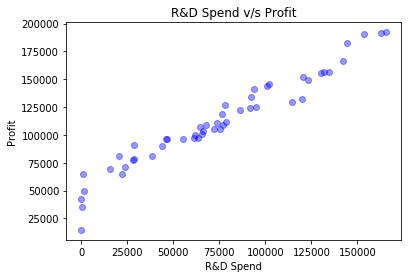

In [153]:
plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.4, color='blue')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')
plt.title('R&D Spend v/s Profit')
plt.show()

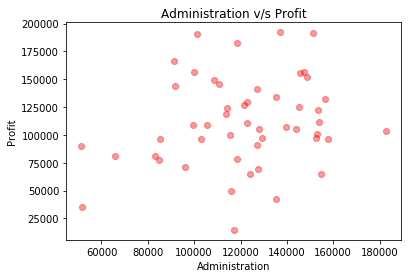

In [154]:
plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.4, color='red')
plt.xlabel('Administration')
plt.ylabel('Profit')
plt.title('Administration v/s Profit')
plt.show()

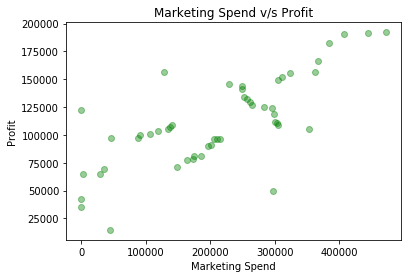

In [155]:
plt.scatter(dataset['Marketing Spend'], dataset['Profit'], color='green', alpha=0.4)
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.title('Marketing Spend v/s Profit')
plt.show()

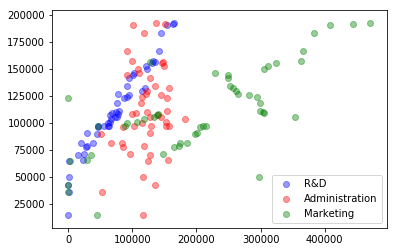

In [156]:
# Let's plot actual scatter plot of all independent variables

ax1 = plt.scatter(dataset['R&D Spend'], dataset['Profit'], alpha=0.4, color='blue', label='R&D')

ax2 = plt.scatter(dataset['Administration'], dataset['Profit'], alpha=0.4, color='red', label='Administration')

ax3 = plt.scatter(dataset['Marketing Spend'], dataset['Profit'], alpha=0.4, color='green', label='Marketing')

plt.legend()
plt.show()

Text(0, 0.5, 'Profit')

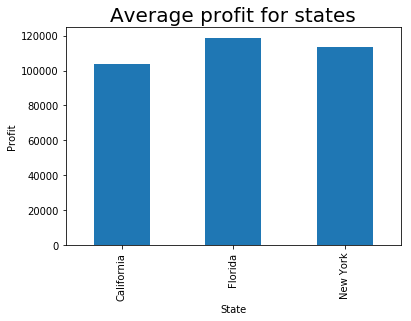

In [157]:
# Create the figure object 
statebyprofit = dataset.groupby(['State'])['Profit'].mean().plot.bar()

# Set the title
statebyprofit.set_title("Average profit for states", fontsize = 20)

# Set x and y-labels
statebyprofit.set_xlabel("State", fontsize = 10)
statebyprofit.set_ylabel("Profit", fontsize = 10)

In [158]:
dataset['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [159]:
# Create dummy variables for each state
# Other option is to create using IMPUTER. But for time being, let's continue with dummy variable option

dataset = pd.read_csv('C:/Users/Public.DESKTOP-6RBQT7L/Desktop/Programming - Maths/SPACY IITians course/Multiple Regression/50_Startups.csv')

dataset['New York'] = np.where(dataset['State']=='New York', 1, 0)
dataset['Florida'] = np.where(dataset['State']=='Florida', 1, 0)
dataset['California'] = np.where(dataset['State']=='California', 1, 0)

print(dataset.head())

# Drop the original column State from the dataframe
dataset.drop(columns=['State'],axis=1,inplace=True)

dataset.head()

   R&D Spend  Administration  Marketing Spend       State     Profit  \
0  165349.20       136897.80        471784.10    New York  192261.83   
1  162597.70       151377.59        443898.53  California  191792.06   
2  153441.51       101145.55        407934.54     Florida  191050.39   
3  144372.41       118671.85        383199.62    New York  182901.99   
4  142107.34        91391.77        366168.42     Florida  166187.94   

   New York  Florida  California  
0         1        0           0  
1         0        0           1  
2         0        1           0  
3         1        0           0  
4         0        1           0  


,R&D Spend,Administration,Marketing Spend,Profit,New York,Florida,California
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,0,1
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [160]:
# Extract Independent variables

x = dataset.loc[: , ['R&D Spend', 'Administration', 'Marketing Spend', 'New York', 'Florida', 'California']].values

print(type(x), x.shape)

print(x[0:5,:]) # print top 5 rows

<class 'numpy.ndarray'> (50, 6)
[[1.6534920e+05 1.3689780e+05 4.7178410e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.6259770e+05 1.5137759e+05 4.4389853e+05 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [1.5344151e+05 1.0114555e+05 4.0793454e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]
 [1.4437241e+05 1.1867185e+05 3.8319962e+05 1.0000000e+00 0.0000000e+00
  0.0000000e+00]
 [1.4210734e+05 9.1391770e+04 3.6616842e+05 0.0000000e+00 1.0000000e+00
  0.0000000e+00]]


In [161]:
# Extract Dependent variables

y = dataset.loc[: , ['Profit']].values

print(type(y), y.shape)

print(y[0:5 , : ])

<class 'numpy.ndarray'> (50, 1)
[[192261.83]
 [191792.06]
 [191050.39]
 [182901.99]
 [166187.94]]


In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [163]:
# Transforming data
scaler = MinMaxScaler()

x_train = scaler.fit_transform(x_train) # Training Data - Fit & Transform
x_test = scaler.transform(x_test) # Test Data - Only Transform

In [164]:
print(x_train[:5])
print()
print(x_test[:5])

[[0.33561668 0.48655174 0.45494286 0.         1.         0.        ]
 [0.2782839  0.3173015  0.43561799 1.         0.         0.        ]
 [0.45557444 0.87258866 0.28413435 0.         1.         0.        ]
 [0.2807759  1.         0.44680961 0.         0.         1.        ]
 [0.55488118 0.59103645 0.62511553 0.         1.         0.        ]]

[[0.39946683 1.23448414 0.25042853 0.         1.         0.        ]
 [0.60884455 0.38067074 0.52936195 0.         0.         1.        ]
 [0.61635061 0.55737746 0.48573267 0.         1.         0.        ]
 [0.16869099 0.31413763 0.34861436 0.         1.         0.        ]
 [0.92798459 0.4685842  0.8646636  0.         1.         0.        ]]


In [165]:
model = LinearRegression()

In [166]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [169]:
model.intercept_

array([44153.95466785])

In [170]:
model.coef_

array([[ 1.27892182e+05,  3.49927567e+03,  1.72720281e+04,
         7.86007422e+02, -8.72645791e+02,  8.66383692e+01]])

In [167]:
y_prediction = model.predict(x_test)

In [168]:
print("RMSE:", math.sqrt(mean_squared_error(y_test, y_prediction)))

print("R2:", r2_score(y_test, y_prediction))

RMSE: 9137.99015279495
R2: 0.9347068473282424
